# Data Analysis Project — Telco Customer Churn
Motivation and aim for this project: To analyze the dataset and to make actionable insights to retain customers 
and increase customers’ lifetime values

In [4]:
####Part 0: Imports the libraries for data loading,visualizition
####Reading data using pandas 
###Count number of rows, columns
### Using DataFrame.head() to get first 5 rows of DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [5]:
df =  pd.read_csv('Data\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Description of this dataset 
The data set includes information about:
    Your answer here

Description of this dataset 

The data set includes information about:
    
   - Customer demographic information: Gender, Dependents, SeniorCitizen
   - Types of products/services each customer uses: phone service, internet service, online security,...
   - Payment amount and method: total charges, monthly charge, payment method, contract
   - Customer churn or not

# PART 1: QUICK DATA CHECK

In [7]:
##Check data types using info() function 
df.info()
## What problem have you observed? -> fix it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The incorrect type of the TotalCharges column

In [8]:
###FIX IT
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [9]:
##Check statistical information using describe()
df.describe()
##Make some conclusions 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is binary type

In [10]:
###Check for null values in our data and decide how to handle null-value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# PART 2: Exploratory Data Analysis: homework

In [11]:
###Check the balance of class label using value_counts()
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
###Create a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), 
###showing the percentage of Churn for each category of the attribute
Your code here
# Draw a conclusion

SyntaxError: invalid syntax (252636051.py, line 3)

In [ ]:
###Create a stacked percentage bar chart for each category of the customer account attributes 
###(Contract, PaperlessBilling, PaymentMethod).
    Your code here
###Draw a conclusion

In [ ]:
#### For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests 
###that all of the attributes will be useful to determine whether or not a customer churns.
### Create a plot to show the distribution of tenure, MontlyCharges, TotalCharges by Churn 
    Your code here
### Draw a conclusion

In [ ]:
###evaluate the percentage of the target for each category of the services columns(PhoneService, MultipleLines, InternetService
###,OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV, StreamingMovie) with stacked bar plots
   Your code here
### Draw a conclusion

# PART 3: FEATURE ENGINEERING

In [13]:
### Use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, 
###(5)PhoneService , and (6)Churn .
### make a copy of your dataframe
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', \
                          'PaperlessBilling', 'PhoneService', 'Churn']
encoder = LabelEncoder()
for col in label_encoding_columns:
    df_transformed[col] = encoder.fit_transform(df[col])              

In [14]:
### Apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, 
### (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV,
### and (10)StreamingMovies.
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']
df_transformed = pd.get_dummies(df_transformed, columns=one_hot_encoding_columns,\
                                drop_first='True')

In [15]:
### Normalization
### Use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
scaler = MinMaxScaler()
for col in min_max_columns:
    df_transformed[col] = scaler.fit_transform(df[[col]])

# PART 4: MODELING

Evaluate Machine Learning Algorithms:
- Train and Validation Sets
- K-Fold Cross Validation

CREATE A VALIDATION DATASET

In [16]:
#SPLIT INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split
# select independent variables

X = df_transformed.drop(columns=['customerID', 'Churn'],axis=1).fillna(0)
y = df_transformed['Churn']
X_train, X_validation, y_train, y_validation =\
train_test_split(X, y, test_size=0.3, random_state = 99)

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


KFOLD CROSS-VALIDATION

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 99
kfold = KFold(n_splits = num_folds, random_state = seed,shuffle=True)
rf_model = RandomForestClassifier()
results  = cross_val_score(rf_model,X_train,y_train,cv=kfold)
for i in range(0,10):
    print("accuracy on fold"+str(i),results[i]*100)

accuracy on fold0 82.75862068965517
accuracy on fold1 80.52738336713996
accuracy on fold2 77.48478701825557
accuracy on fold3 83.16430020283975
accuracy on fold4 75.86206896551724
accuracy on fold5 79.5131845841785
accuracy on fold6 79.71602434077079
accuracy on fold7 76.47058823529412
accuracy on fold8 77.079107505071
accuracy on fold9 78.29614604462475


In [18]:
print(results.mean(),results.std())

0.7908722109533468 0.02392219544644957


CLASSIFICATION METRICS:
    - Classification accuracy
    - Area Under ROC Curve
    - Confusion Matrix
    - Classification Report

In [19]:
scoring = "roc_auc"
results  = cross_val_score(rf_model,X_train,y_train,cv=kfold,scoring=scoring)
print(results.mean(),results.std())

0.8283738686145312 0.02254411070291479


In [20]:
results

array([0.88198771, 0.81562694, 0.81053276, 0.85400845, 0.82741761,
       0.82373167, 0.8354098 , 0.81714636, 0.81657174, 0.80130565])

CHOOSE THE BEST MACHINE LEARNING MODEL
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data

LR: 0.841339 (0.020533)
KNN: 0.780163 (0.019768)
DT: 0.653414 (0.027397)
SVM: 0.800217 (0.022625)
RF: 0.827908 (0.023289)


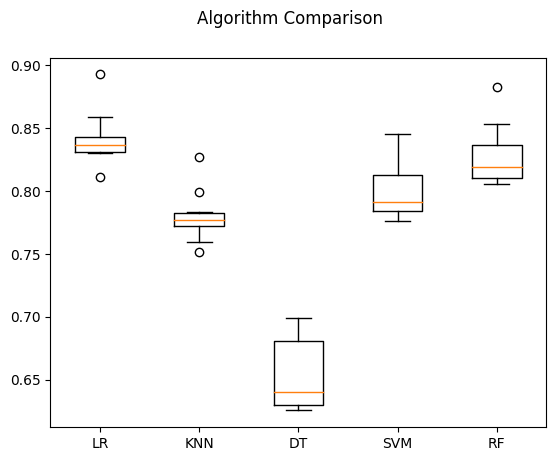

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
###prepare models
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('RF',RandomForestClassifier()))
###evaluate each model
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = KFold(n_splits=10,random_state = 99,shuffle=True)
    cv_results = cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

HYPERPARAMETER TUNING
- Grid Search Parameter Tuning
- Random Search Parameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
####Random Search Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid,scoring='roc_auc')
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

c:\Users\Admin\Downloads\References\22-23-1\Data-driven MKT\mkt-env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Admin\Downloads\References\22-23-1\Data-driven MKT\mkt-env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Admin\Downloads\References\22-23-1\Data-driven MKT\mkt-env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.

0.8403496674060886
{'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


In [24]:
 rf_model = grid.best_estimator_

MAKE PREDICTIONS

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
prob_predictions = [item[1] for item in rf_model.predict_proba(X_validation)]
predictions = rf_model.predict(X_validation)
print(roc_auc_score(y_validation, prob_predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8398415247073525
[[1406  146]
 [ 287  274]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [47]:
###RandomForest+KFOLD
from sklearn.metrics import roc_auc_score
kfold = KFold(n_splits=5, shuffle=True)
# enumerate splits
scores = []
models = []
models.append((LogisticRegression()))
models.append((KNeighborsClassifier()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((RandomForestClassifier()))
for model in models:
    for (train_ix, test_ix) in kfold.split(X_train):  # tra ve 4 bo train test, 4 model
        train_X, test_X = X_train.iloc[train_ix], X_train.iloc[test_ix]
        train_y, test_y = y_train.iloc[train_ix], y_train.iloc[test_ix]
    # fit model  
        model.fit(train_X, train_y)
    # evaluate model
        ###CALCULATE Y_PROBA
        prob_predictions = [item[1] for item in model.predict_proba(test_X)]
        predictions = model.predict(test_y)
        ###CALCULATE AUC_SCORE
        auc_score = roc_auc_score(test_y, prob_predictions)
    # store score
        scores.append(auc_score)
        print('> ', auc_score)
    # summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

c:\Users\Admin\Downloads\References\22-23-1\Data-driven MKT\mkt-env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
# Hyperparameter Tuning với Logistic Regression

####Random Search Parameter Tuning
log_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid = RandomizedSearchCV(estimator = log_model, param_distributions = grid, scoring='roc_auc')
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8406867637049451
{'solver': 'liblinear', 'penalty': 'l2', 'C': 100}


In [38]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# Lỗi?

TypeError: Parameter grid should be a dict or a list, got: RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='roc_auc') of type RandomizedSearchCV